# Data Visualization Notebook

In [3]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt

### Open *OBS Grids* and *PK Arrays*

In [4]:
obs_grids = h5py.File("../data/raw/sims_v3/sim2/obs_grids.hdf5", "r")
pk_arrays = h5py.File("../data/raw/sims_v3/sim2/pk_arrays.hdf5", "r")

### Data Structure

In [5]:
print("OBS GRIDS")
print("Top-Level:\n", list(obs_grids.keys()))
print("Data:\n", list(obs_grids["data"].keys()))
print("Header:\n", list(obs_grids["header"].keys()))
print("")
print("PK ARRAYS")
print("Top-Level:\n", list(pk_arrays.keys()))
print("Data:\n", list(pk_arrays["data"].keys()))
print("Header:\n", list(pk_arrays["header"].keys()))

OBS GRIDS
Top-Level:
 ['data', 'header']
Data:
 ['gal_map', 'ksz_map', 't0vals', 't21_map', 'tau_map', 'xmval_list', 'xval_list', 'zval_list', 'zvals']
Header:
 ['BoxSize', 'N_grid', 'OmegaB', 'OmegaL', 'OmegaM', 'OmegaR', 'Tcmb0', 'YHe', 'alpha_zre', 'b0_zre', 'hubble0', 'kb_zre', 'nsinit', 'sigma8', 'tau', 'theta_max_ksz', 'wde', 'zmean_zre']

PK ARRAYS
Top-Level:
 ['data', 'header']
Data:
 ['pk_dd', 'pk_dx', 'pk_tt', 'pk_xx', 'vrms', 'xmval_list', 'xval_list', 'zval_list']
Header:
 ['BoxSize', 'N_grid', 'OmegaB', 'OmegaL', 'OmegaM', 'OmegaR', 'Tcmb0', 'YHe', 'alpha_zre', 'b0_zre', 'hubble0', 'kb_zre', 'nsinit', 'sigma8', 'tau', 'theta_max_ksz', 'wde', 'zmean_zre']


## Simulation Parameters (Input)
Each simulation changes three parameters to control the reionization history (with an optional fourth). These parameters are inputs to the simulation (ksz_2lpt.x) and are chosen using Latin Hypercube Sampling (LHS) to evenly cover the parameter space without running every possible combination.
- **`zmean`** (7.0 - 9.0) : Sets the midpoint of reionization.
- **`alpha`** (0.10 - 0.90) : Controls how long reionization lasts.
- **`kb`** (0.10 - 2.0) : Determines how uneven the ionized regions are (higher values more clustered).
- **`b0`** (? - ?) : Adjusts the overall strength or amplitude of the ionization field.

In [6]:
print("alpha_zre:\t", float(pk_arrays["header"]["alpha_zre"][()]))
print("b0_zre:\t\t", float(pk_arrays["header"]["b0_zre"][()]))
print("kb_zre:\t\t", float(pk_arrays["header"]["kb_zre"][()]))
print("zmean_zre:\t", float(pk_arrays["header"]["zmean_zre"][()]))
print("b0_zre:\t", float(pk_arrays["header"]["b0_zre"][()]))

alpha_zre:	 0.2929134939207717
b0_zre:		 0.5931198102016607
kb_zre:		 0.214155444324432
zmean_zre:	 7.051103334648629
b0_zre:	 0.5931198102016607


## Output
- **`tau`** — The optical depth to reionization; measures how many CMB photons were scattered by free electrons.
- **`xmval_list`** — The average ionized fraction of the universe at different times; shows how reionization progressed.
- **`xval_list`** — The ionized fraction sampling points used to track changes in the ionization history.
- **`zval_list`** — The redshift values that correspond to each point in the ionization history.
- **`ksz_map`** — A 2D map of temperature fluctuations caused by the kinematic Sunyaev–Zel’dovich effect.

### Optical Depth to Reionization (tau)

In [7]:
print("tau:\t\t", float(pk_arrays["header"]["tau"][()]))

tau:		 0.05136939091567354


### Mean Ionized Fraction History (xmval_list)

In [8]:
print("xmval:\n", pk_arrays["data"]["xmval_list"][()])

xmval:
 [6.02600117e-04 1.47725282e-02 8.99343421e-02 2.48350546e-01
 4.43436694e-01 6.20375166e-01 7.54880096e-01 8.47085502e-01
 9.06506199e-01 9.43434236e-01 9.65922615e-01 9.79463214e-01
 9.87589213e-01 9.92464027e-01 9.95397585e-01 9.97172702e-01
 9.98250229e-01 9.98910935e-01 9.99316226e-01 9.99566216e-01
 9.99723066e-01 9.99885824e-01 9.99951149e-01 9.99978180e-01
 9.99990134e-01 9.99995370e-01]


### Ionization Fraction Samples (xval_list)

In [9]:
print("xval:\n", pk_arrays["data"]["xval_list"][()])

xval:
 [0.00137567 0.02707004 0.13957185 0.33984504 0.55220633 0.72091853
 0.83491129 0.90521742 0.94639573 0.96985188 0.98303882 0.99041374
 0.99454622 0.99687162 0.9981895  0.99894317 0.99937692 0.99962977
 0.99977761 0.99986472 0.99991704 0.99996833 0.99998738 0.99999472
 0.99999776 0.99999901]


### Redshift Values (zval list)

In [10]:
print("zval:\n", pk_arrays["data"]["zval_list"][()])

zval:
 [ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  16.  17.  18.  19.  20. ]


### kSZ Map

In [11]:
ksz_map0 = obs_grids["data"]["ksz_map"][()]
print("Shape: ", ksz_map0.shape)

Shape:  (1024, 1024)


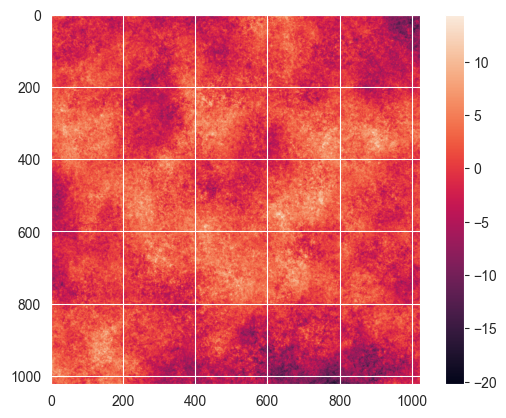

In [12]:
tcmb = 2.73
rescaled_map = ksz_map0 * tcmb * 1e6
fig, ax = plt.subplots()
im = ax.imshow(rescaled_map)
cb = plt.colorbar(im)
plt.show()

20.246709001089936
14.398407697803856 -20.246709001089936


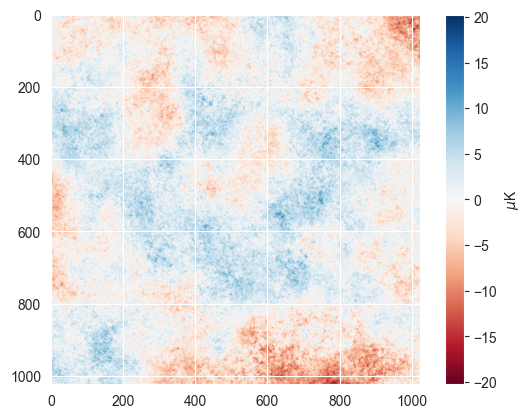

In [13]:
tmax = np.amax(rescaled_map)
tmin = np.amin(rescaled_map)
textreme = max(tmax, np.abs(tmin))
print(textreme)
print(tmax, tmin)

fig, ax = plt.subplots()
im = ax.imshow(rescaled_map, cmap="RdBu", vmin=-textreme, vmax=textreme)
cb = plt.colorbar(im, label=r"$\mu$K")
plt.show()

### Close Files

In [14]:
obs_grids.close()
pk_arrays.close()